In [77]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [78]:
#import pandas 
import pandas as pd
#import numpy
import numpy as np

In [79]:
#set the address of the dataframe containing the pre-processed dataset
dataFramePickleAddress="E:/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"

In [80]:
#read the dataframe
dataframe=pd.read_pickle(dataFramePickleAddress)

In [81]:
#print the dataframe
dataframe

,Max Lat per section,Min Lat per section,Max Lon per section,Min Lon per section,No. of spectra per section,Total active time per section,Summed Spectra,Normalized Spectra,Log Normalized Spectra,Aluminum,...,Magnesium,Oxygen,Potassium,Silicon,Thorium,Titanium,Uranium,Denoised Log Scaled Spectra,Continuum Removed Denoised Log Scaled Spectra,Normalized Continuum Removed Denoised Log Scaled Spectra
0,-87.5,-90.0,180.0,-180.0,7002,215153.707937,"[270112.3731329723, 44221.71628033137, 45327.9...","[75.32634479500912, 12.332127585726989, 12.640...","[1.8769468938381042, 1.0910380092016139, 1.101...",15.151,...,3.5168,45.289,299.99,20.793,0.46453,0.17034,0.17684,"[2.158214838616408, 2.157544331369737, 2.15556...","[0.0, 0.0031096864344261066, 0.005679290051129...","[0.0, 0.008732596361173385, 0.0159485365101445..."
1,-82.5,-87.5,-135.0,-180.0,1599,49113.391313,"[101728.76450092324, 11353.802617173642, 10565...","[124.27824075904886, 13.87051756806718, 12.906...","[2.0943950968999223, 1.1420926667518603, 1.110...",13.394,...,4.2240,45.529,376.77,22.029,0.65727,0.11806,0.14017,"[2.166600464940364, 2.1658480356144825, 2.1637...","[0.0, 0.0031162181188209015, 0.005685493606940...","[0.0, 0.00854362748004175, 0.01558772125881830..."
2,-82.5,-87.5,-90.0,-135.0,1940,59600.854365,"[69004.10988058499, 13041.311258502305, 12455....","[69.4662289143658, 13.12864863838364, 12.53878...","[1.8417737231418783, 1.118220025472807, 1.0982...",13.634,...,3.5352,44.660,375.20,20.907,0.59783,0.16417,0.25209,"[2.1624604406884194, 2.1617557577637347, 2.159...","[0.0, 0.003128077634203974, 0.0057268713902404...","[0.0, 0.008671523159558032, 0.0158757881675521..."
3,-82.5,-87.5,-45.0,-90.0,1818,55864.552890,"[51455.21453525051, 11348.088811988011, 11487....","[55.264254565457236, 12.188146033430378, 12.33...","[1.742444316396172, 1.085937649122431, 1.09122...",14.642,...,3.6490,44.706,255.60,20.687,0.44024,0.21359,0.15456,"[2.156835106449848, 2.156137776072336, 2.15427...","[0.0, 0.0031223821127568385, 0.005761526562635...","[0.0, 0.008548415452029046, 0.0157738293766423..."
4,-82.5,-87.5,0.0,-45.0,1855,57007.157885,"[51138.233213284286, 10203.879826977849, 12005...","[53.82296024948041, 10.739577490433051, 12.635...","[1.7309675801735431, 1.030987195964759, 1.1015...",14.030,...,3.4253,44.777,299.84,20.930,0.41695,0.00000,0.17853,"[2.1550525786763455, 2.15430812063849, 2.15245...","[0.0, 0.0030380779680346803, 0.005615903444584...","[0.0, 0.00860571082569534, 0.01590770269151066..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,87.5,82.5,45.0,0.0,1748,53653.126808,"[172204.68795185376, 12837.986652251333, 11392...","[192.57556626933405, 14.356650673799725, 12.73...","[2.2846011835800297, 1.1570531332525222, 1.105...",14.908,...,4.8716,44.940,935.92,20.180,1.65770,0.11112,0.47992,"[2.15549824869262, 2.1548999596086973, 2.15302...","[0.0, 0.0031042509343501834, 0.005683791947784...","[0.0, 0.008672476703310141, 0.0158790491800041..."
1786,87.5,82.5,90.0,45.0,2035,62483.348769,"[69631.4865040512, 13027.290796013549, 12597.1...","[66.8640409410214, 12.509531949810704, 12.0964...","[1.8251926197192418, 1.0972410606592737, 1.082...",14.201,...,4.9509,45.074,725.37,20.989,1.47520,0.23089,0.31377,"[2.14741575183071, 2.14686561246586, 2.1451899...","[0.0, 0.003080477682960492, 0.0056969814199795...","[0.0, 0.008773223933367814, 0.0162250465303427..."
1787,87.5,82.5,135.0,90.0,1903,58474.988092,"[58870.11519813659, 11691.651373354718, 11794....","[60.40543191435932, 11.996566485773727, 12.102...","[1.781075993991352, 1.07905696524328, 1.082869...",14.718,...,3.5729,44.902,615.29,20.763,1.13880,0.14168,0.36836,"[2.1464838830391613, 2.1458006278534687, 2.143...","[0.0, 0.003018919479894744, 0.0055261654685280...","[0.0, 0.008498570047967925, 0.0155567263862845..."
1788,87.5,82.5,180.0,135.0,1902,58399.244640,"[69077.49428235987, 10543.676356979646, 11999....","[70.97094632772614, 10.832684314943478, 12.328...","[1.85108059

In [82]:
#get the abundance values for the seven elements for which the model is to be trained
#aluminium
aluminiumAbundances=dataframe['Aluminum'].to_numpy()
#calcium
calciumAbundances=dataframe['Calcium'].to_numpy()
#iron
ironAbundances=dataframe['Iron'].to_numpy()
#magnesium
magnesiumAbundances=dataframe['Magnesium'].to_numpy()
#oxygen
oxygenAbundances=dataframe['Oxygen'].to_numpy()
#silicon
siliconAbundances=dataframe['Silicon'].to_numpy()
#titanium
titaniumAbundances=dataframe['Titanium'].to_numpy()

In [83]:
#create an list which contains the element names to be estimated
elementNames=['Aluminum',
              'Calcium',
              'Iron',
              'Magnesium',
              'Oxygen',
              'Silicon',
              'Titanium']
#conver the list to a numpy array
elementNames=np.array(elementNames)

In [84]:
#combine the elemental abundances into a single matrix
allElementalAbundances=np.dstack([aluminiumAbundances,
                                  calciumAbundances,
                                  ironAbundances,
                                  magnesiumAbundances,
                                  oxygenAbundances,
                                  siliconAbundances,
                                  titaniumAbundances])
#reshape the abundance matrix
allElementalAbundances=allElementalAbundances[0,:,:]
#rescale weigth percent values from % (0-100) to franctions (0-1)
allElementalAbundances=allElementalAbundances/100

In [85]:
#read the pre-processed spectra as a numpy array
preprocessedSpectra=dataframe['Normalized Continuum Removed Denoised Log Scaled Spectra'].to_numpy()
#reshape the numpy array
preprocessedSpectra=np.vstack(preprocessedSpectra)

In [86]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain

In [87]:
#get the index of the last relavent band
finalRelaventBandIndex=np.argmin(np.abs(energyBands-8000))
#compute the index of the first relavent band
firstRelaventBandIndex=finalRelaventBandIndex-preprocessedSpectra.shape[1]+1
#get the energies of the relavent bands
relaventEnergyBands=energyBands[firstRelaventBandIndex:finalRelaventBandIndex+1]

In [88]:
#remove the variables no longer needed from memory
del firstRelaventBandIndex
del finalRelaventBandIndex
del energyBands
del gain
del dataframe
del dataFramePickleAddress
del aluminiumAbundances
del calciumAbundances
del ironAbundances
del magnesiumAbundances
del oxygenAbundances
del siliconAbundances
del titaniumAbundances

In [89]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt

In [90]:
#set plot parameters
baseFontSize=18
noOfBinsForHistogram=100
noOfXticks=5

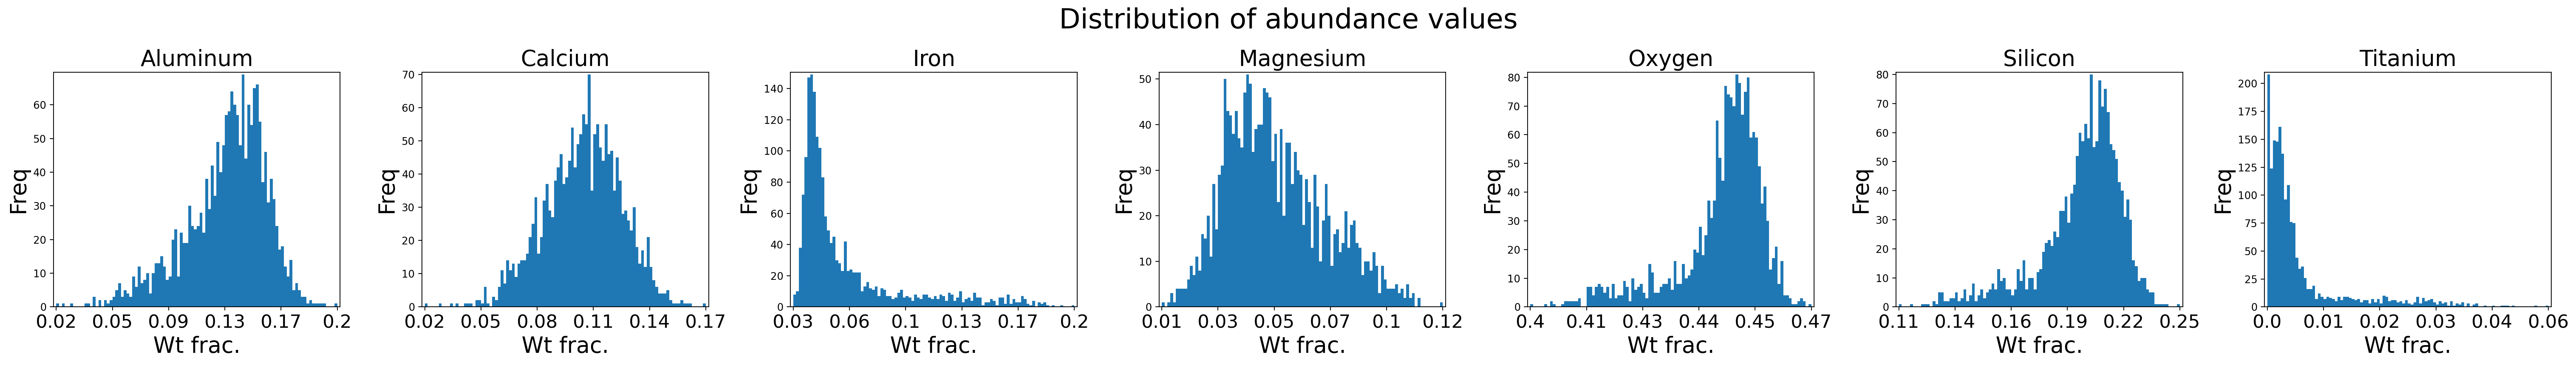

In [91]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=7,
                         figsize=(35,5),
                         dpi=200)
#iterate over all elements
for i in range(elementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(allElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(elementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("Wt frac.",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(allElementalAbundances[:,i]),
                                 np.amax(allElementalAbundances[:,i])+np.ptp(allElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(allElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(allElementalAbundances[:,i]),
                                                 np.amax(allElementalAbundances[:,i])+np.ptp(allElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(allElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

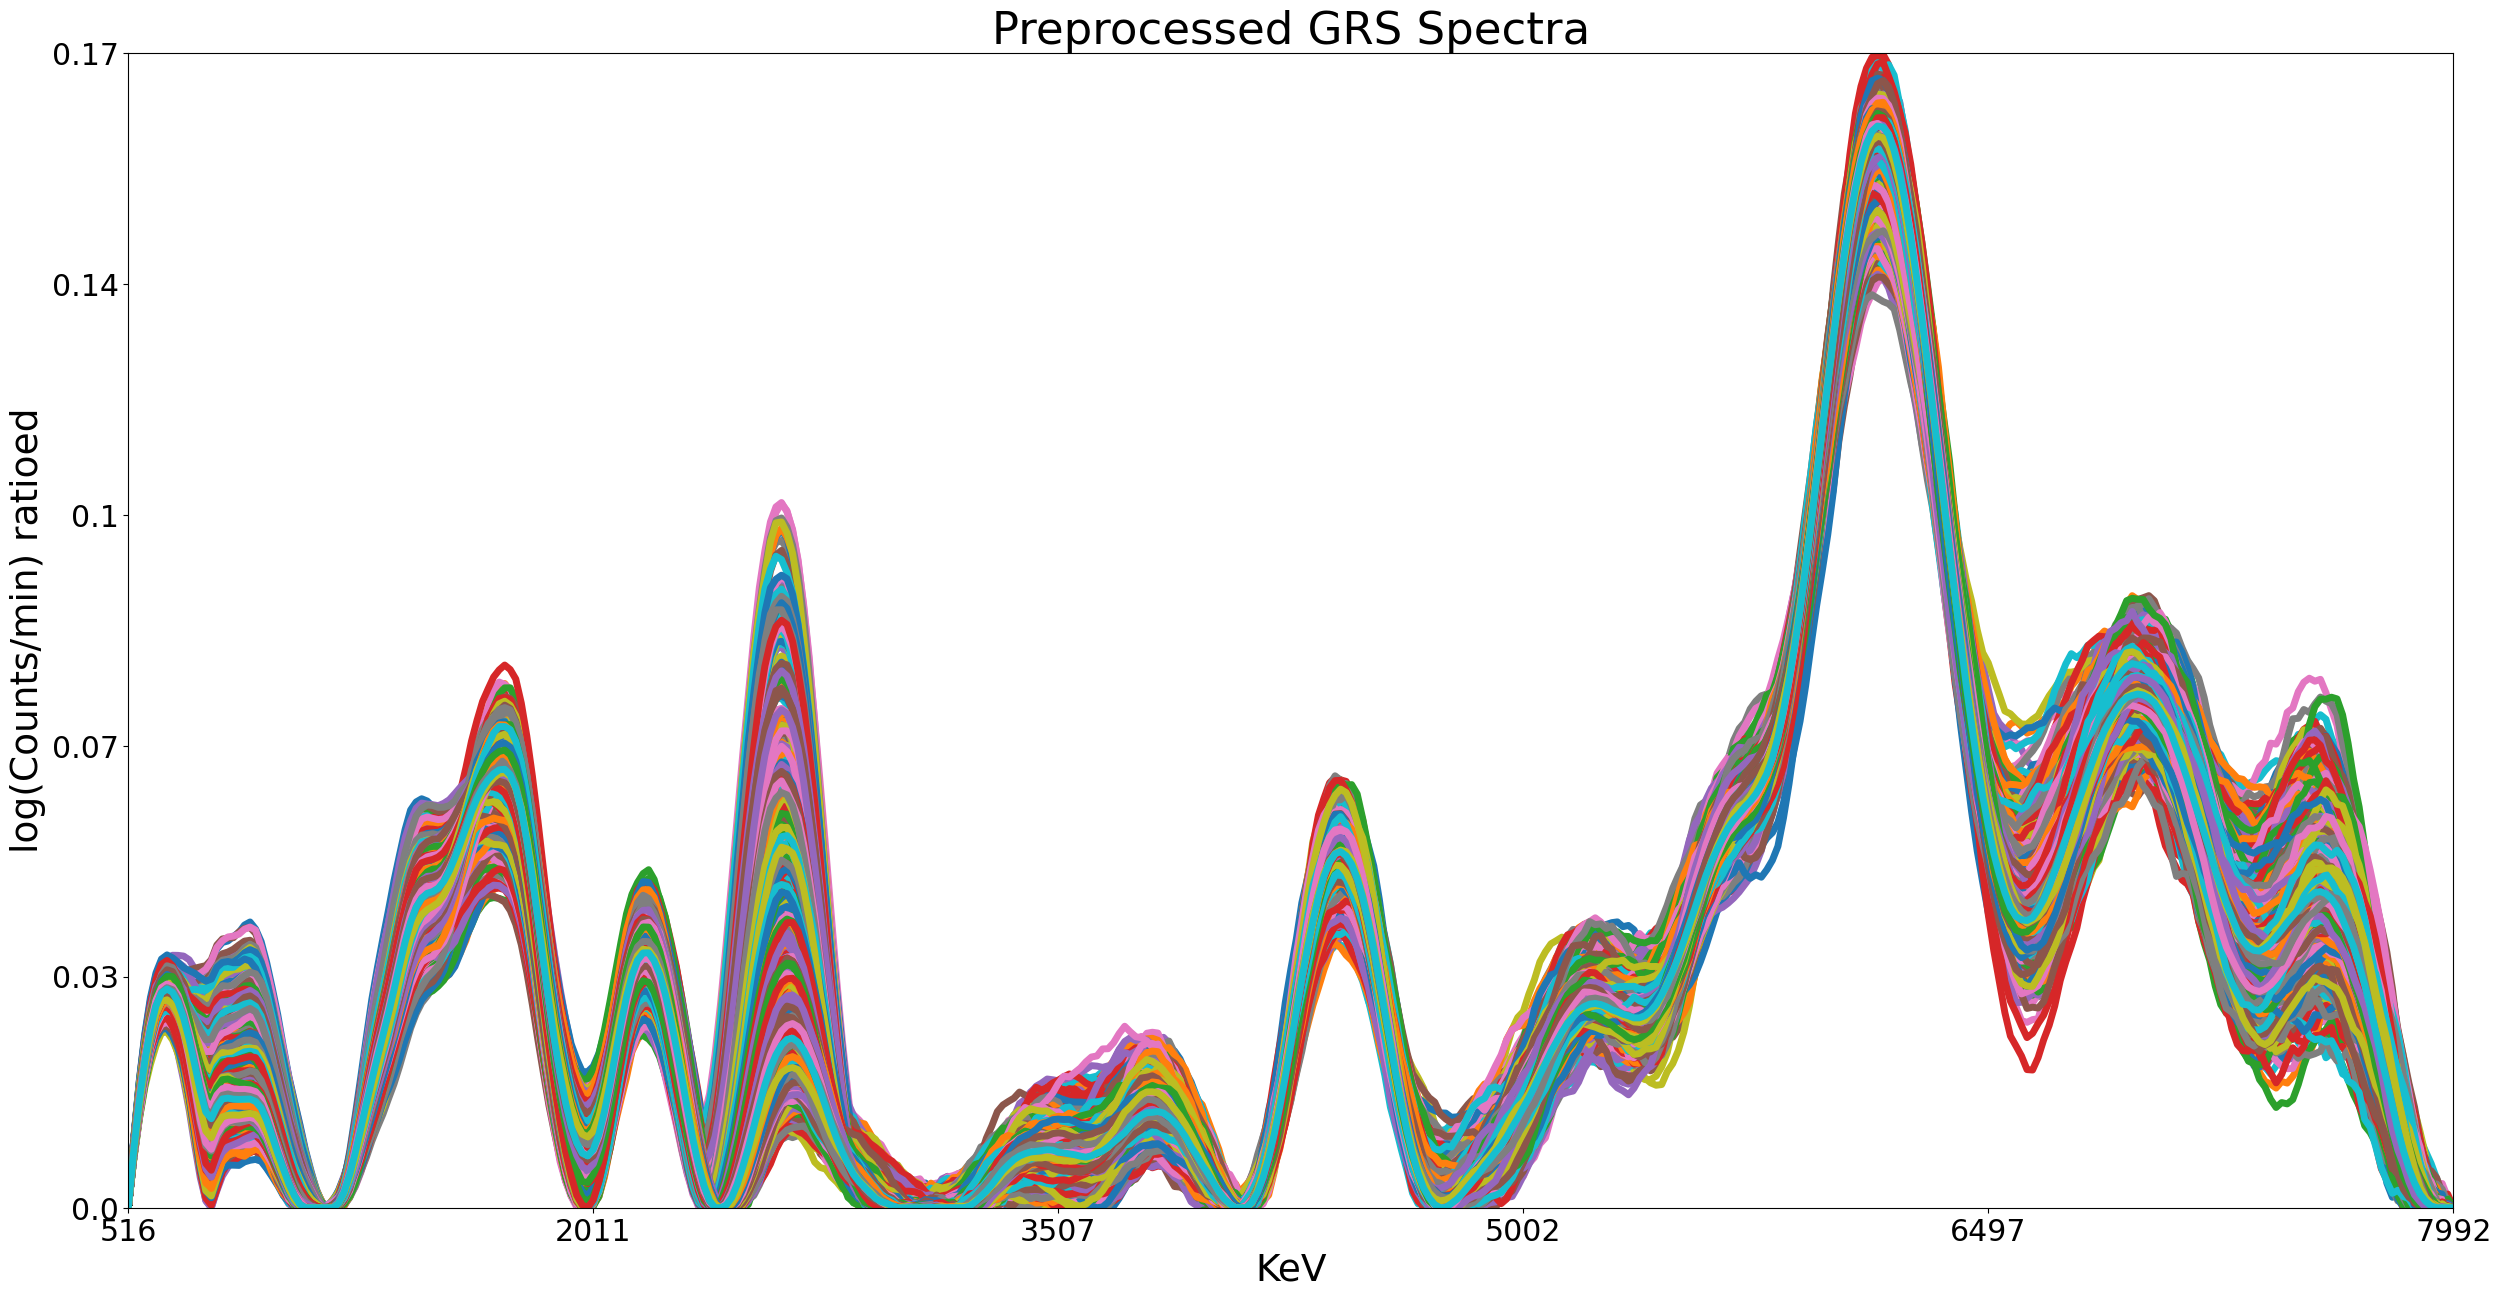

In [92]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(preprocessedSpectra.shape[0]):
    plt.plot(relaventEnergyBands,
             preprocessedSpectra[i,:],
             lw=5)
#annotate the figure
plt.title("Preprocessed GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(np.arange(np.amin(relaventEnergyBands),
                     np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                     np.ptp(relaventEnergyBands)/noOfXticks),
           fontsize=baseFontSize*1.2)
plt.yticks(np.arange(np.amin(preprocessedSpectra),
                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                     np.ptp(preprocessedSpectra)/noOfXticks),
           labels=np.round(np.arange(np.amin(preprocessedSpectra),
                                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                                     np.ptp(preprocessedSpectra)/noOfXticks),
                           2),
           fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min) ratioed",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [93]:
#import tensorflow
import tensorflow as tf

In [94]:
#set a global seed value
globalSeed=23

In [95]:
#compute the number of channels in the pre-processed spectra
noOfChannels=preprocessedSpectra.shape[1]

In [96]:
#create an input layer
inputLayer=tf.keras.Input(shape=(noOfChannels,
                                 1))

In [97]:
#create a NN (Neural Network) graph containing just the input layer
nnGraph=inputLayer

In [98]:
#create a convolutional block
firstConvolutionalLayer=tf.keras.layers.Conv1D(filters=32,
                                               kernel_size=5,
                                               strides=3,
                                               padding='valid',
                                               name="1st_Conv_layer")
#add the 1st Conv layer to the graph
nnGraph=firstConvolutionalLayer(nnGraph)

#apply Relu activation
firstReluActivation=tf.keras.layers.Activation('relu',
                                               name="1st_Activation")
#add the 1st activation layer to the graph
nnGraph=firstReluActivation(nnGraph)

#apply batch normalization
firstBatchNormalization=tf.keras.layers.BatchNormalization(name="1st_Batch_Norm")
#add the 1st batch-norm layer to the graph
nnGraph=firstBatchNormalization(nnGraph)

#apply dropout
firstDropoutLayer=tf.keras.layers.Dropout(0.5,
                                          noise_shape=None,
                                          seed=globalSeed,
                                          name="1st_Dropout")
#add the 1st dropout layer to the graph
nnGraph=firstDropoutLayer(nnGraph)

In [99]:
#print the shape of the tensor outputed by the 1st convolutional block
print(f"Shape of tensor after first convolutional block in the encoder: {nnGraph.shape}")

Shape of tensor after first convolutional block in the encoder: (None, 139, 32)


In [100]:
#create a convolutional block
secondConvolutionalLayer=tf.keras.layers.Conv1D(filters=16,
                                               kernel_size=5,
                                               strides=3,
                                               padding='valid',
                                               name="2nd_Conv_layer")
#add the 2nd Conv layer to the graph
nnGraph=secondConvolutionalLayer(nnGraph)

#apply Relu activation
secondReluActivation=tf.keras.layers.Activation('relu',
                                               name="2nd_Activation")
#add the 2nd activation layer to the graph
nnGraph=secondReluActivation(nnGraph)

#apply batch normalization
secondBatchNormalization=tf.keras.layers.BatchNormalization(name="2nd_Batch_Norm")
#add the 2nd batch-norm layer to the graph
nnGraph=secondBatchNormalization(nnGraph)

#apply dropout
secondDropoutLayer=tf.keras.layers.Dropout(0.5,
                                          noise_shape=None,
                                          seed=globalSeed,
                                          name="2nd_Dropout")
#add the 2nd dropout layer to the graph
nnGraph=secondDropoutLayer(nnGraph)

In [101]:
#print the shape of the tensor outputed by the 2nd convolutional block
print(f"Shape of tensor after second convolutional block in the encoder: {nnGraph.shape}")

Shape of tensor after second convolutional block in the encoder: (None, 45, 16)


In [102]:
#create a convolutional block
thirdConvolutionalLayer=tf.keras.layers.Conv1D(filters=16,
                                               kernel_size=5,
                                               strides=3,
                                               padding='valid',
                                               name="3rd_Conv_layer")
#add the 3rd Conv layer to the graph
nnGraph=thirdConvolutionalLayer(nnGraph)

#apply Relu activation
thirdReluActivation=tf.keras.layers.Activation('relu',
                                               name="3rd_Activation")
#add the 3rd activation layer to the graph
nnGraph=thirdReluActivation(nnGraph)

#apply batch normalization
thirdBatchNormalization=tf.keras.layers.BatchNormalization(name="3rd_Batch_Norm")
#add the 3rd batch-norm layer to the graph
nnGraph=thirdBatchNormalization(nnGraph)

#apply dropout
thirdDropoutLayer=tf.keras.layers.Dropout(0.5,
                                          noise_shape=None,
                                          seed=globalSeed,
                                          name="3rd_Dropout")
#add the 3rd dropout layer to the graph
nnGraph=thirdDropoutLayer(nnGraph)

In [103]:
#print the shape of the tensor outputed by the 3rd convolutional block
print(f"Shape of tensor after third convolutional block in the encoder: {nnGraph.shape}")

Shape of tensor after third convolutional block in the encoder: (None, 14, 16)


In [104]:
#create a flatten layer to flatten the features extracted by the convolutional blocks
flattenedFeatures=tf.keras.layers.Flatten()
#add the flatten layer to the graph
nnGraph=flattenedFeatures(nnGraph)

In [105]:
#print the shape of the flattened features
print(f"Shape of flattened features in the encoder: {nnGraph.shape}")

Shape of flattened features in the encoder: (None, 224)


In [106]:
#add a fully connected layer to the network
firstFullyConnectedLayer=tf.keras.layers.Dense(112,
                                               activation='relu',
                                               name="1st_Fully_Connected_Layer")
nnGraph=firstFullyConnectedLayer(nnGraph)

In [107]:
#print the number of nodes outputted by the first fully connected layer
print(f"Shape of Nodes outputed by the first Fully connected layer of the encoder: {nnGraph.shape}")

Shape of Nodes outputed by the first Fully connected layer of the encoder: (None, 112)


In [108]:
#add a fully connected layer to the network (output layer)
secondFullyConnectedLayer=tf.keras.layers.Dense(7,
                                                activation='relu',
                                                name="7_Element_Abundance_Embedding")
nnGraph=secondFullyConnectedLayer(nnGraph)

In [109]:
#print the number of output nodes in the network
print(f"Shape of Nodes outputed by the second Fully connected layer of the encoder: {nnGraph.shape}")

Shape of Nodes outputed by the second Fully connected layer of the encoder: (None, 7)


In [110]:
#define a function which given the output of a layer, ensures the sum of the values is one
#it does this by computing the sum of the nodes and dividing each note by it
def estimateAbundances(inputNodes):
    sampleWiseSums=tf.keras.backend.sum(inputNodes,
                                     axis=1,keepdims=True)
    return inputNodes/sampleWiseSums


In [111]:
#add a normalization lyaer to the network
abundanceEmbedding=tf.keras.layers.Lambda(estimateAbundances)(nnGraph)

In [112]:
#print the number of  nodes in the abundance layer
print(f"Shape of Nodes outputed by the encoder, i.e. the embedding: {abundanceEmbedding.shape}")

Shape of Nodes outputed by the encoder, i.e. the embedding: (None, 7)


In [113]:
#load the pre-trained models
#define a funtion to calculate the Pearsons correlation between two sets of values
def pearson_correlation(x,y):
    x_mean=tf.reduce_mean(x)
    y_mean=tf.reduce_mean(y)
    x_diff=x-x_mean
    y_diff=y-y_mean
    covariance=tf.reduce_mean(tf.multiply(x_diff,y_diff))
    x_std=tf.sqrt(tf.reduce_mean(tf.square(x_diff)))
    y_std=tf.sqrt(tf.reduce_mean(tf.square(y_diff)))
    correlation=covariance/(x_std*y_std)
    return correlation

#Potassium Abundance estimator
kAbundanceEstimator=tf.keras.models.load_model("E:/Ml4Sci_GRS_abundance_estimation/Models/untrained_K_Abundance_Model.h5",
                                               custom_objects={'pearson_correlation':pearson_correlation},
                                               compile=True)
#Uranium Abundance estimator
uAbundanceEstimator=tf.keras.models.load_model("E:/Ml4Sci_GRS_abundance_estimation/Models/untrained_U_Abundance_Model.h5",
                                               custom_objects={'pearson_correlation':pearson_correlation},
                                               compile=True)
#Thorium Abundance estimator
thAbundanceEstimator=tf.keras.models.load_model("E:/Ml4Sci_GRS_abundance_estimation/Models/untrained_Th_Abundance_Model.h5",
                                                custom_objects={'pearson_correlation':pearson_correlation},
                                                compile=True)

In [114]:
#as the abundance estimators for K, U and Th are already trained set, freeze their weights
#set each layer's trainable parameter to false
for currentLayer in kAbundanceEstimator.layers:
    currentLayer.trainable=False
for currentLayer in uAbundanceEstimator.layers:
    currentLayer.trainable=False
for currentLayer in thAbundanceEstimator.layers:
    currentLayer.trainable=False

In [115]:
#concatenate all ten abundance values into a single tensor
allAbundanceValues=tf.concat([abundanceEmbedding,
                              kAbundanceEstimator.outputs[0],
                              uAbundanceEstimator.outputs[0],
                              thAbundanceEstimator.outputs[0]],
                             axis=-1)

In [116]:
#set the inputs of the three abundance estimators to the be the same as the auto-encoder
kAbundanceEstimator._input_layers=inputLayer
uAbundanceEstimator._input_layers=inputLayer
thAbundanceEstimator._input_layers=inputLayer

In [117]:
#print the number of  nodes in the all element abundance layer
print(f"Shape of Nodes after concattenating all elemental abundances together: {allAbundanceValues.shape}")

Shape of Nodes after concattenating all elemental abundances together: (None, 10)


In [118]:
#add a fully connected layer to the decoder
firstFullyConnectedLayerDecoder=tf.keras.layers.Dense(112,
                                               activation='relu',
                                               name="1st_Fully_Connected_Layer_Decoder")
nnGraph=firstFullyConnectedLayerDecoder(allAbundanceValues)

In [119]:
#print the number of nodes in the first fully connected layer of the decoder
print(f"Shape of Nodes in the first Fully Connected Layer of the decoder: {nnGraph.shape}")

Shape of Nodes in the first Fully Connected Layer of the decoder: (None, 112)


In [120]:
#expand the number of dimensions by one converting the shape of the tensor to (None,112,1)
nnGraph=tf.expand_dims(nnGraph,
                       axis=-1)
#print the number of nodes in after expanding the dimensions
print(f"Shape of Nodes in the first Fully Connected Layer of the decoder: {nnGraph.shape}")

Shape of Nodes in the first Fully Connected Layer of the decoder: (None, 112, 1)


In [121]:
#add a Transposed convolution layer to the decoder
firstTransposedConvolutionalLayer=tf.keras.layers.Conv1DTranspose(filters=16,
                                                                  kernel_size=5,
                                                                  strides=1,
                                                                  activation=None,
                                                                  name="1st_Trans_Conv_Layer")
nnGraph=firstTransposedConvolutionalLayer(nnGraph)

#apply Relu activation
firstDecoderReluActivation=tf.keras.layers.Activation('relu',
                                                      name="1st_Decoder_Activation")
#add the activation layer to the graph
nnGraph=firstDecoderReluActivation(nnGraph)

#apply batch normalization
firstDecoderBatchNormalization=tf.keras.layers.BatchNormalization(name="1st_Decoder_Batch_Norm")
#add the 2nd batch-norm layer to the graph
nnGraph=firstDecoderBatchNormalization(nnGraph)

#apply dropout
firstDecoderDropoutLayer=tf.keras.layers.Dropout(0.5,
                                                 noise_shape=None,
                                                 seed=globalSeed,
                                                 name="1st_Decoder_Dropout")
#add the 2nd dropout layer to the graph
nnGraph=firstDecoderDropoutLayer(nnGraph)

In [122]:
#print the number of nodes outputed by the first transposed convolutional layer
print(f"Shape of Nodes in the first Transposed Convolutional Layer of the decoder: {nnGraph.shape}")

Shape of Nodes in the first Transposed Convolutional Layer of the decoder: (None, 116, 16)


In [123]:
#expand the dimensions of the 

In [124]:
#add a Transposed convolution layer to the decoder
secondTransposedConvolutionalLayer=tf.keras.layers.Conv1DTranspose(filters=16,
                                                                   kernel_size=5,
                                                                   strides=1,
                                                                   padding='valid',
                                                                   activation=None,
                                                                   name="2nd_Trans_Conv_Layer")
nnGraph=secondTransposedConvolutionalLayer(nnGraph)

#apply Relu activation
secondDecoderReluActivation=tf.keras.layers.Activation('relu',
                                                      name="2nd_Decoder_Activation")
#add the activation layer to the graph
nnGraph=secondDecoderReluActivation(nnGraph)

#apply batch normalization
secondDecoderBatchNormalization=tf.keras.layers.BatchNormalization(name="2nd_Decoder_Batch_Norm")
#add the 2nd batch-norm layer to the graph
nnGraph=secondDecoderBatchNormalization(nnGraph)

#apply dropout
secondDecoderDropoutLayer=tf.keras.layers.Dropout(0.5,
                                                 noise_shape=None,
                                                 seed=globalSeed,
                                                 name="2nd_Decoder_Dropout")
#add the 2nd dropout layer to the graph
nnGraph=secondDecoderDropoutLayer(nnGraph)

In [125]:
#print the number of nodes outputed by the second transposed convolutional layer
print(f"Shape of Nodes in the second Transposed Convolutional Layer of the decoder: {nnGraph.shape}")

Shape of Nodes in the second Transposed Convolutional Layer of the decoder: (None, 120, 16)


In [126]:
#add a Transposed convolution layer to the decoder
thirdTransposedConvolutionalLayer=tf.keras.layers.Conv1DTranspose(filters=32,
                                                                   kernel_size=5,
                                                                   strides=1,
                                                                   padding='valid',
                                                                   activation=None,
                                                                   name="3rd_Trans_Conv_Layer")
nnGraph=thirdTransposedConvolutionalLayer(nnGraph)

#apply Relu activation
thirdDecoderReluActivation=tf.keras.layers.Activation('relu',
                                                      name="3rd_Decoder_Activation")
#add the activation layer to the graph
nnGraph=thirdDecoderReluActivation(nnGraph)

#apply batch normalization
thirdDecoderBatchNormalization=tf.keras.layers.BatchNormalization(name="3rd_Decoder_Batch_Norm")
#add the 2nd batch-norm layer to the graph
nnGraph=thirdDecoderBatchNormalization(nnGraph)

#apply dropout
thirdDecoderDropoutLayer=tf.keras.layers.Dropout(0.5,
                                                 noise_shape=None,
                                                 seed=globalSeed,
                                                 name="3rd_Decoder_Dropout")
#add the 2nd dropout layer to the graph
nnGraph=thirdDecoderDropoutLayer(nnGraph)

In [127]:
#print the number of nodes outputed by the third transposed convolutional layer
print(f"Shape of Nodes in the third Transposed Convolutional Layer of the decoder: {nnGraph.shape}")

Shape of Nodes in the third Transposed Convolutional Layer of the decoder: (None, 124, 32)


In [128]:
#create a flatten layer to flatten the features extracted by the convolutional blocks
flattenedDecoderFeatures=tf.keras.layers.Flatten()
#add the flatten layer to the graph
nnGraph=flattenedDecoderFeatures(nnGraph)

In [129]:
#print the shape of the flattened features in the decoder
print(f"Shape of flattened features in the decoder: {nnGraph.shape}")

Shape of flattened features in the decoder: (None, 3968)


In [130]:
#add a fully connected layer to the decoder
secondFullyConnectedLayerDecoder=tf.keras.layers.Dense(2048,
                                                       activation='relu',
                                                       name="2nd_Fully_Connected_Layer_Decoder")
nnGraph=secondFullyConnectedLayerDecoder(nnGraph)

In [131]:
#print the shape of the flattened features in the decoder
print(f"No. of nodes in the penultimate layer of the decoder: {nnGraph.shape}")

No. of nodes in the penultimate layer of the decoder: (None, 2048)


In [132]:
#add a fully connected layer to the decoder
thirdFullyConnectedLayerDecoder=tf.keras.layers.Dense(noOfChannels,
                                                      activation='relu',
                                                      name="3rd_Fully_Connected_Layer_Decoder")
nnGraph=thirdFullyConnectedLayerDecoder(nnGraph)

In [133]:
#print the shape of the flattened features in the decoder
print(f"No. of nodes outputted by the decoder: {nnGraph.shape}")

No. of nodes outputted by the decoder: (None, 421)


In [134]:
#build the model
kAbundanceEstimator=tf.keras.Model(inputs=inputLayer,
                                   outputs=[abundanceEmbedding,
                                            nnGraph],
                                   name="Unmixing_Autoencoder")

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 421, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'") at layer "1st_Conv_layer". The following previous layers were accessed without issue: ['1st_Conv_layer']

In [135]:
tf.keras.utils.plot_model(kAbundanceEstimator)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [59]:
#create the loss function for the embedding, Mean Squared Error
embeddingLossFunction=tf.keras.losses.MeanSquaredError()

In [60]:
#create the loss function for the decoder, Cosine similarity
decoderLossFunction=tf.keras.losses.CosineSimilarity()

In [ ]:
#create the optimizer
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)

In [ ]:
#set the number of epochs the model is to be trained for
noOfEpochs=10**5

In [ ]:
#set the batch size
batchSize=64

In [ ]:
#set the scaling factor balancing the reconstruction loss with the 